<a href="https://colab.research.google.com/github/tmquan11032003/Machine_Learning/blob/main/E-Commerce_Shipping_Data_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# data manipulation
import numpy as np
import pandas as pd


# data visualization
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import (chi2_contingency, randint,
                         expon, gamma, uniform, loguniform)

# data processing
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import (OneHotEncoder, OrdinalEncoder,
                                   MinMaxScaler, StandardScaler,
                                   LabelEncoder)
from sklearn.compose import ColumnTransformer

# imblanced dataset
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import EditedNearestNeighbours, RandomUnderSampler
from imblearn.combine import SMOTEENN

# binary classification
from sklearn.preprocessing import PolynomialFeatures


# modelling
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import train_test_split,StratifiedKFold,cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier,
                              GradientBoostingClassifier,ExtraTreesClassifier)
from sklearn.tree import (DecisionTreeClassifier, ExtraTreeClassifier)
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn import metrics


# metrics
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay, recall_score, precision_score, f1_score, accuracy_score,roc_auc_score,roc_curve



# 1. Data Overview and Processing

In [2]:
file_url = 'https://drive.google.com/file/d/1k4dh7DG1PJS5Vb3a3T0xWmU9Z8VHKrjV/view?usp=sharing'
file_id = file_url.split('/')[-2]
url = 'https://drive.google.com/uc?id=' + file_id

print(file_id)
print(url)

df = pd.read_csv(url, index_col = 'ID')

1k4dh7DG1PJS5Vb3a3T0xWmU9Z8VHKrjV
https://drive.google.com/uc?id=1k4dh7DG1PJS5Vb3a3T0xWmU9Z8VHKrjV


In [3]:
df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
ID,,,,,,,,,,,
1,D,Flight,4,2,177,3,low,F,44,1233,1
2,F,Flight,4,5,216,2,low,M,59,3088,1
3,A,Flight,2,2,183,4,low,M,48,3374,1
4,B,Flight,3,3,176,4,medium,M,10,1177,1
5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [4]:
df.tail()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
ID,,,,,,,,,,,
10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10997,C,Ship,5,4,242,5,low,F,4,1155,0
10998,F,Ship,5,2,223,6,medium,M,2,1210,0
10999,D,Ship,2,5,155,5,low,F,6,1639,0


In [5]:
df.sample(5)

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
ID,,,,,,,,,,,
4680,F,Ship,4,5,205,3,medium,F,9,4411,0
1606,B,Ship,5,2,140,4,high,M,58,1175,1
4125,A,Flight,4,1,233,2,low,M,7,4403,1
6788,F,Ship,4,4,247,3,high,F,2,5324,1
5642,F,Ship,4,1,209,4,medium,F,1,5057,0


In [6]:
df.shape

(10999, 11)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10999 entries, 1 to 10999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Warehouse_block      10999 non-null  object
 1   Mode_of_Shipment     10999 non-null  object
 2   Customer_care_calls  10999 non-null  int64 
 3   Customer_rating      10999 non-null  int64 
 4   Cost_of_the_Product  10999 non-null  int64 
 5   Prior_purchases      10999 non-null  int64 
 6   Product_importance   10999 non-null  object
 7   Gender               10999 non-null  object
 8   Discount_offered     10999 non-null  int64 
 9   Weight_in_gms        10999 non-null  int64 
 10  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 1.0+ MB


In [8]:
df.isnull().sum()

Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

No null data

In [9]:
df[df.duplicated()]

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
ID,,,,,,,,,,,


No duplicate rows

In [10]:
n = df.shape[0]
for colname, dtype in df.dtypes.items():
    n_miss = df[colname].isna().sum()
    print("{cn:<30} | {dt:<7} | {nu:>5} | {cm:>7d} | {pm:>3.2f}%".format(
        cn=colname, dt=str(dtype), nu=df[colname].nunique(),
        cm=n_miss, pm=n_miss / n * 100
    ))

Warehouse_block                | object  |     5 |       0 | 0.00%
Mode_of_Shipment               | object  |     3 |       0 | 0.00%
Customer_care_calls            | int64   |     6 |       0 | 0.00%
Customer_rating                | int64   |     5 |       0 | 0.00%
Cost_of_the_Product            | int64   |   215 |       0 | 0.00%
Prior_purchases                | int64   |     8 |       0 | 0.00%
Product_importance             | object  |     3 |       0 | 0.00%
Gender                         | object  |     2 |       0 | 0.00%
Discount_offered               | int64   |    65 |       0 | 0.00%
Weight_in_gms                  | int64   |  4034 |       0 | 0.00%
Reached.on.Time_Y.N            | int64   |     2 |       0 | 0.00%


In [11]:
df.columns

Index(['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

In [12]:
features = ['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls','Customer_rating', 'Prior_purchases',
            'Product_importance', 'Gender','Reached.on.Time_Y.N']
def convert_cat(feature,df):
  for feature in features:
    df[feature] = df[feature].astype('category')
convert_cat(features,df)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10999 entries, 1 to 10999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Warehouse_block      10999 non-null  category
 1   Mode_of_Shipment     10999 non-null  category
 2   Customer_care_calls  10999 non-null  category
 3   Customer_rating      10999 non-null  category
 4   Cost_of_the_Product  10999 non-null  int64   
 5   Prior_purchases      10999 non-null  category
 6   Product_importance   10999 non-null  category
 7   Gender               10999 non-null  category
 8   Discount_offered     10999 non-null  int64   
 9   Weight_in_gms        10999 non-null  int64   
 10  Reached.on.Time_Y.N  10999 non-null  category
dtypes: category(8), int64(3)
memory usage: 431.1 KB


In [14]:
#Data distribution
print('Numeric')
display(df.describe())  # numerical data

print('Categorical')
display(df.describe(exclude = [int, float]))  # categorical data


Numeric


,Cost_of_the_Product,Discount_offered,Weight_in_gms
count,10999.000000,10999.000000,10999.000000
mean,210.196836,13.373216,3634.016729
std,48.063272,16.205527,1635.377251
min,96.000000,1.000000,1001.000000
25%,169.000000,4.000000,1839.500000
50%,214.000000,7.000000,4149.000000
75%,251.000000,10.000000,5050.000000
max,310.000000,65.000000,7846.000000


Categorical


,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Prior_purchases,Product_importance,Gender,Reached.on.Time_Y.N
count,10999,10999,10999,10999,10999,10999,10999,10999
unique,5,3,6,5,8,3,2,2
top,F,Ship,4,3,3,low,F,1
freq,3666,7462,3557,2239,3955,5297,5545,6563


# 2. Explore Data Analysis (EDA)

In [15]:
#Xem những style
plt.style.use("default")

In [16]:
drop_col = ['ID']
target_col = 'Reached.on.Time_Y.N'
feature_cols = [col for col in df.columns
                if (col != target_col and col not in drop_col)]
df = df[sorted(feature_cols) + [target_col]]

In [17]:
print('features')
display(feature_cols)

print('target')
display(target_col)

features


['Warehouse_block',
 'Mode_of_Shipment',
 'Customer_care_calls',
 'Customer_rating',
 'Cost_of_the_Product',
 'Prior_purchases',
 'Product_importance',
 'Gender',
 'Discount_offered',
 'Weight_in_gms']

target


'Reached.on.Time_Y.N'

## Target Value

In [18]:
df['Reached.on.Time_Y.N'].value_counts(normalize=True).to_frame()

,Reached.on.Time_Y.N
1,0.596691
0,0.403309


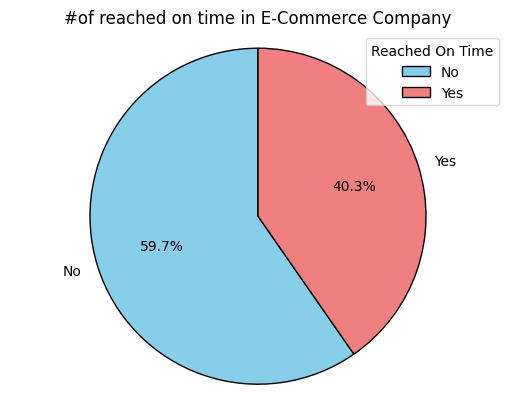

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Giả sử df là DataFrame của bạn

import pandas as pd
import matplotlib.pyplot as plt

# Giả sử df là DataFrame của bạn

# Tính toán value_counts
value_counts = df['Reached.on.Time_Y.N'].value_counts(normalize=True)

# Tạo biểu đồ tròn
plt.pie(value_counts, autopct='%1.1f%%', labels=['No', 'Yes'], startangle=90, colors=['skyblue', 'lightcoral'], wedgeprops=dict(edgecolor='black'))

# Tùy chỉnh biểu đồ
plt.title('#of reached on time in E-Commerce Company')
plt.axis('equal')  # Đảm bảo biểu đồ tròn
plt.legend(title='Reached On Time', loc='upper right')
plt.show()


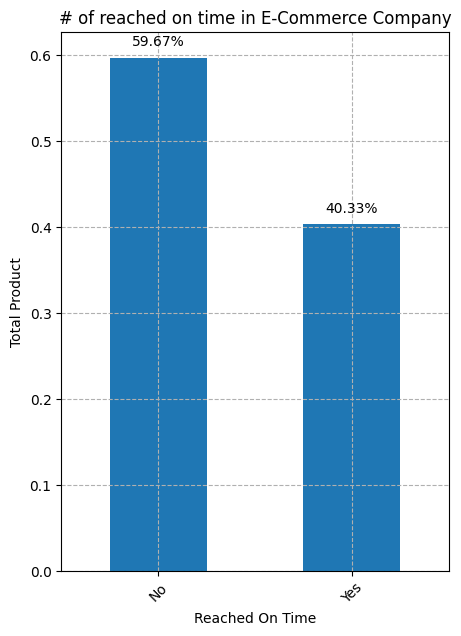

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Giả sử df là DataFrame của bạn
plt.figure(figsize = (5, 7))
# Tính toán value_counts
value_counts = df['Reached.on.Time_Y.N'].value_counts(normalize=True)

# Tạo biểu đồ cột
ax = value_counts.plot.bar()

# Thêm số lượng trực tiếp lên khung biểu đồ
for i, v in enumerate(value_counts):
    ax.text(i, v + 0.01, f'{v:.2%}', ha='center', va='bottom')

# Tùy chỉnh biểu đồ
plt.grid(linestyle='--')
plt.xlabel('Reached On Time')
plt.ylabel('Total Product')
plt.title('# of reached on time in E-Commerce Company')
x = [0, 1]
label = ['No', 'Yes']
plt.xticks(x, label, rotation=45)

# Hiển thị biểu đồ
plt.show()


It's a bad sign. `No reached on time` is more than `reached on time`.



## Categorical Feature

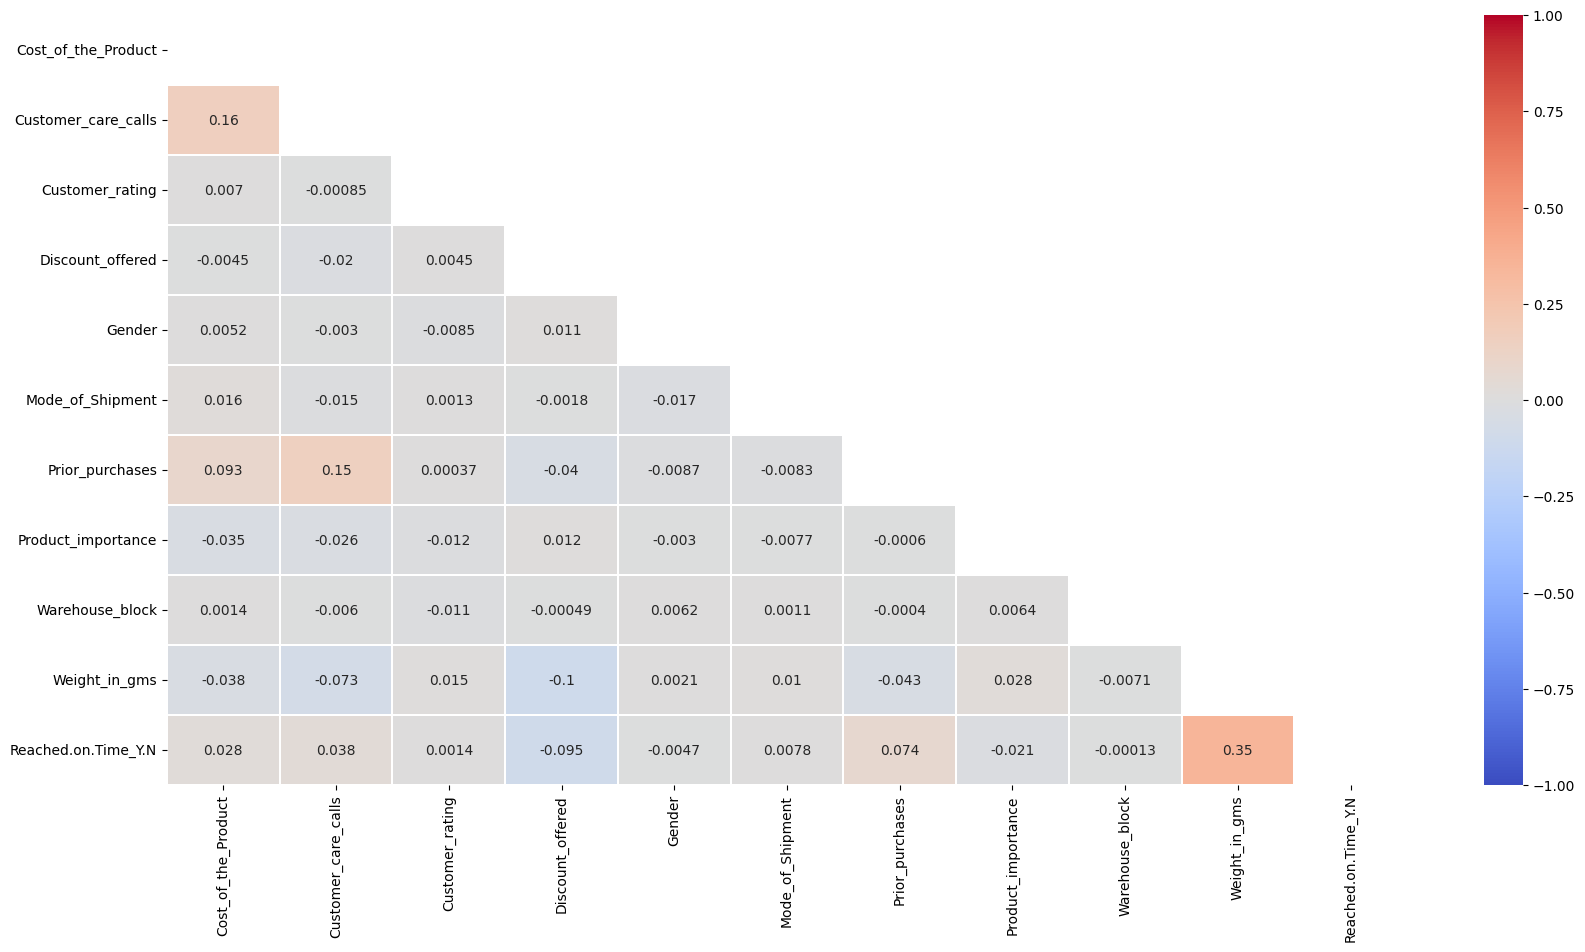

In [21]:
#Vẽ hình ma trận tương quan (correlation matrix) để xem tương quan giữa các biến
plt.figure(figsize=(20, 10))
corr = df.apply(lambda x: pd.factorize(x)[0]).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

In [22]:
import plotly.express as px
warehouse_counts = df['Warehouse_block'].value_counts()

# Create a pie chart using Plotly
fig = px.pie(values=warehouse_counts, names=warehouse_counts.index, hole=0.5)

# Customize the colors and add labels and title
fig.update_traces(marker=dict(colors=px.colors.sequential.matter_r))
fig.update_traces(textinfo='percent+label')
fig.update_layout(width=650, height=400, title='Warehouse Blocks')

# Show the plot
fig.show()

* This graph displays the usage of five warehouse blocks for product storage.

* The F block had a greater quantity of stored products than the other blocks.

* The remaining blocks have roughly equal quantities of stored products.

<ipython-input-23-a1f4aa60674a>:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-23-a1f4aa60674a>:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-23-a1f4aa60674a>:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-23-a1f4aa60674a>:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-23-a1f4aa60674a>:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and wi

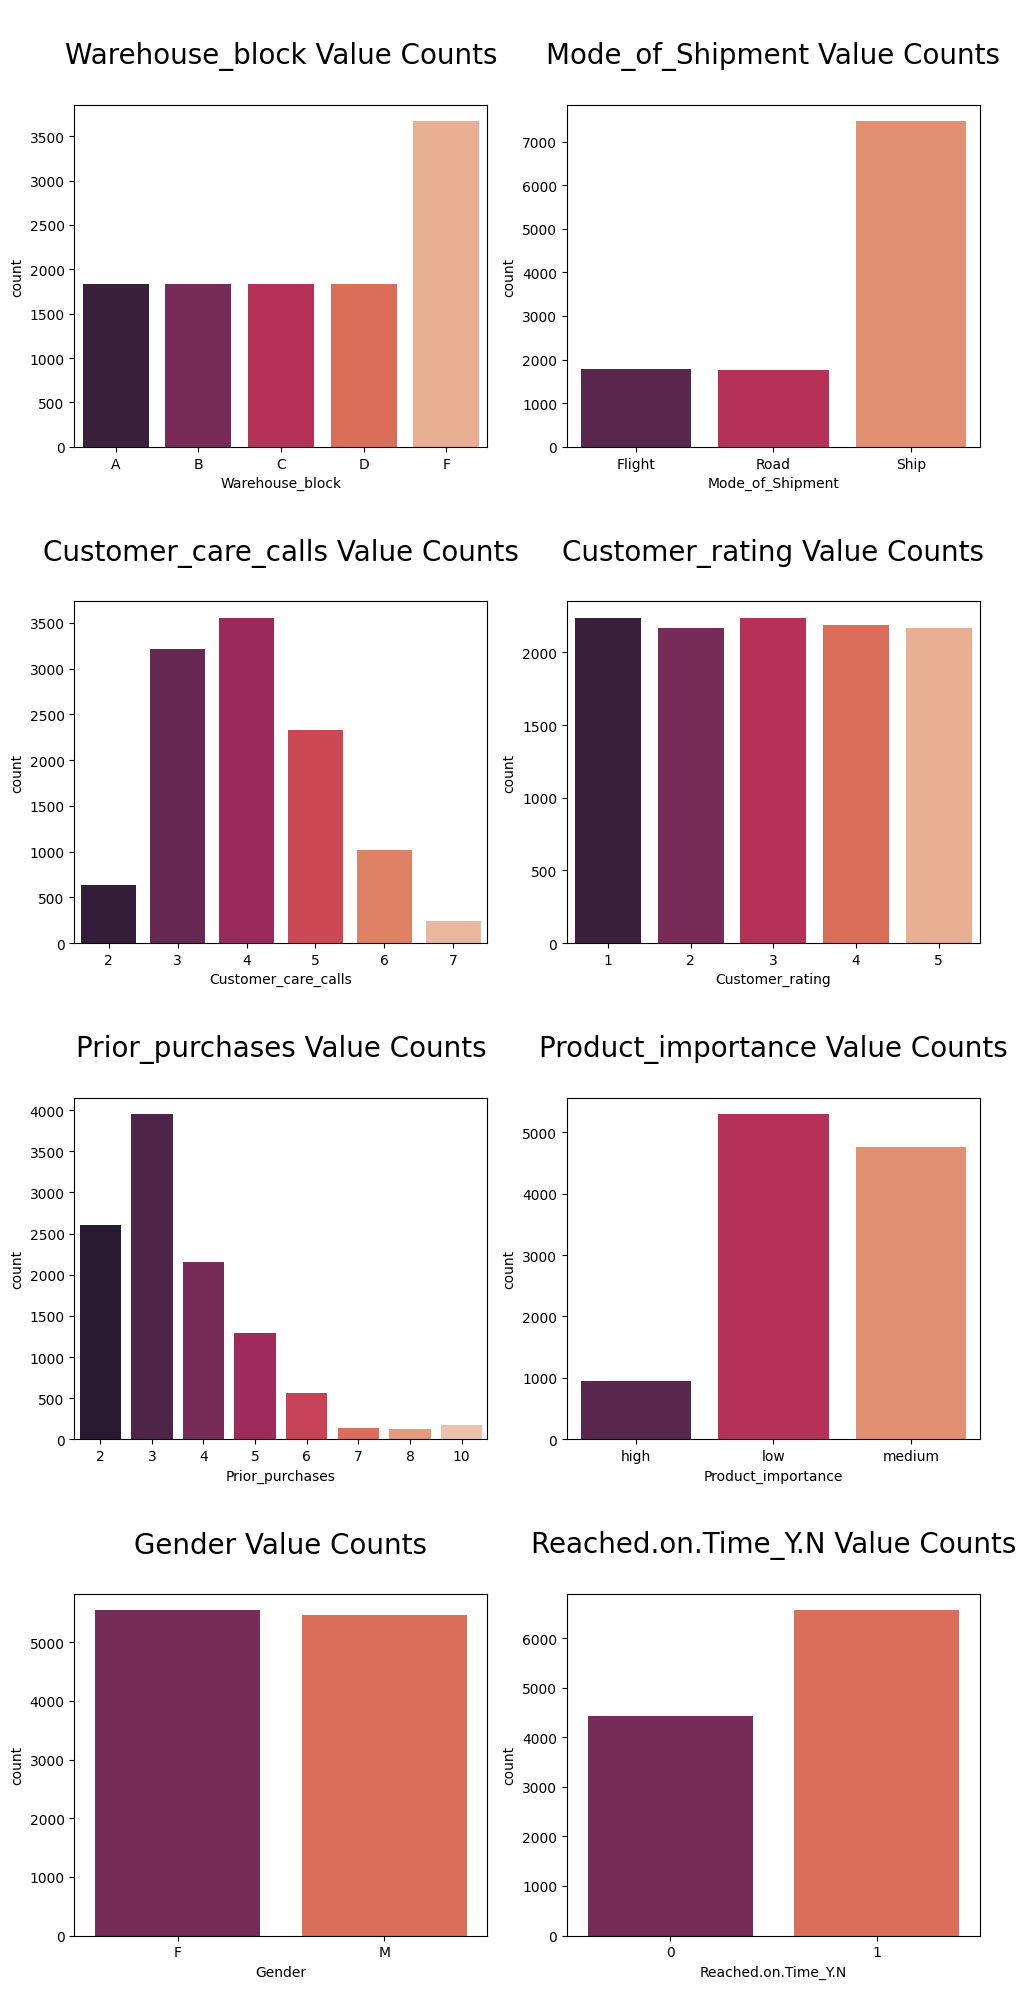

In [23]:
# here by these plots we are lookin at the counts of each categories in the categorical columns
# creating a list of categorical coumns
cat_cols = ['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls', 'Customer_rating',
        'Prior_purchases', 'Product_importance', 'Gender', 'Reached.on.Time_Y.N']

plt.figure(figsize = (10, 20))
plotnumber = 1

# plotting the countplot of each categorical column.

for i in range(len(cat_cols)):
    if plotnumber <= 8:
        ax = plt.subplot(4, 2, plotnumber)
        sns.countplot(x = cat_cols[i], data = df, ax = ax, palette='rocket')
        plt.title(f"\n{cat_cols[i]} Value Counts\n", fontsize = 20)

    plotnumber += 1

plt.tight_layout()
plt.show()

From the above plots, we can conclude following:-

* Warehouse block F have has more values than all other Warehouse blocks.
* In mode of shipment columns we can clearly see that ship delivers the most of products to the customers.
* Most of the customers calls 3 or 4 times to the customer care centers.
* Customer Ratings does not have much variation.
* Most of the customers have 3 prior purchases.
* We can say that most of the products are of low Importance.
* Gender Column doesn't have much variance.
* More products doesn't reach on time than products reached on time.

In [24]:
df['Customer_care_calls'].value_counts().to_frame()

,Customer_care_calls
4,3557
3,3217
5,2328
6,1013
2,638
7,246


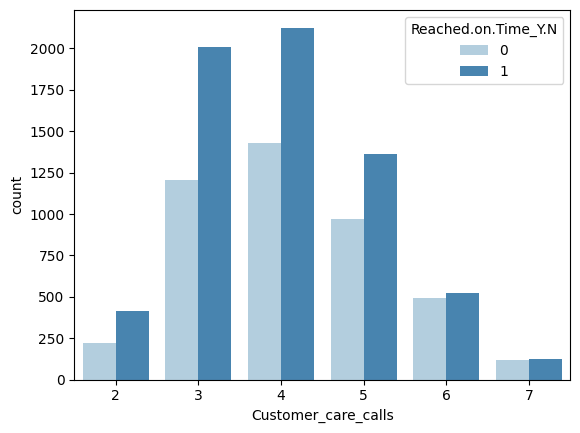

In [25]:
sns.countplot(data = df, x='Customer_care_calls', hue='Reached.on.Time_Y.N', palette = 'Blues');

Ta có thể thấy được càng nhiều cuộc gọi gặp sóc khách hàng thì ...


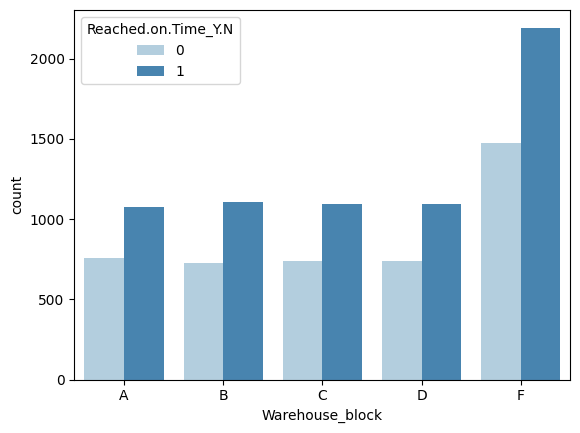

In [26]:
sns.countplot(data = df, x='Warehouse_block', hue='Reached.on.Time_Y.N', palette = 'Blues');

## Numerical Features

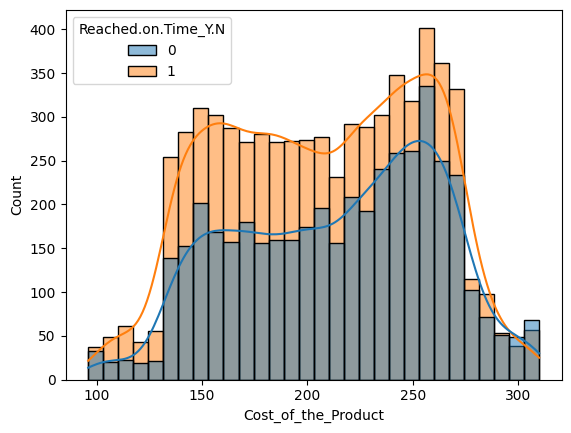

In [27]:
# making a histplot of cost of the product column
sns.histplot(df,x = 'Cost_of_the_Product',hue='Reached.on.Time_Y.N',kde=True);

Có thể thấy giá hàng cao thì sẽ ship đúng thời hạn :))

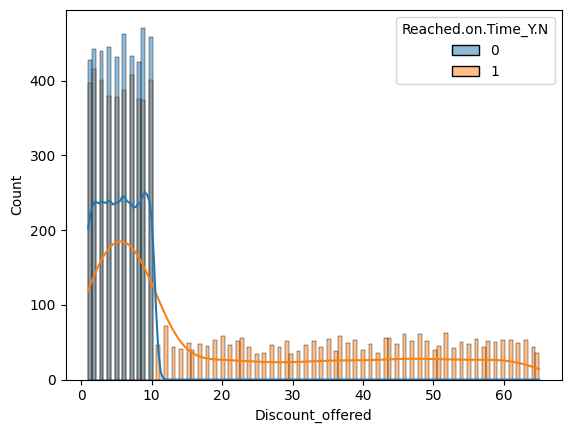

In [28]:
# making a histplot of cost of the product column
sns.histplot(df,x = 'Discount_offered',hue='Reached.on.Time_Y.N',kde=True);

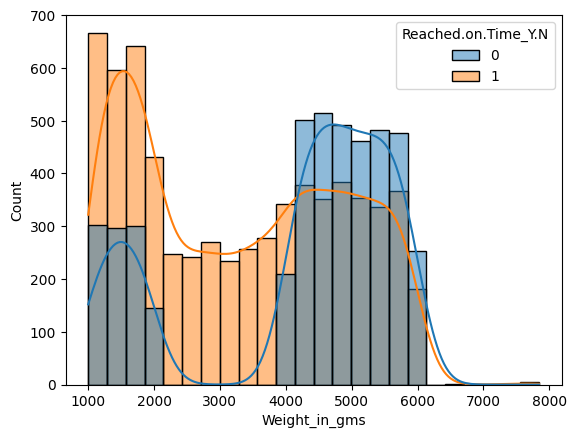

In [29]:
# making a histplot of cost of the product column
sns.histplot(df,x = 'Weight_in_gms',hue='Reached.on.Time_Y.N',kde=True);

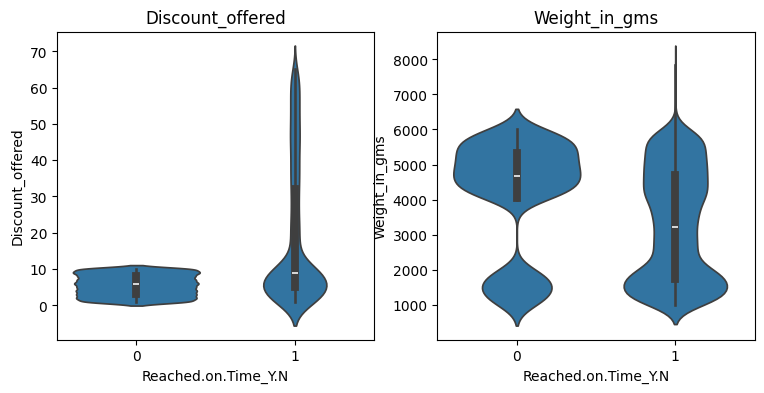

In [30]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
gender_colname = 'Reached.on.Time_Y.N'
columns = ['Discount_offered', 'Weight_in_gms']
for ax, colname in zip(axes, columns):
    sns.violinplot(ax=ax, data=df, x=gender_colname, y=colname)
    ax.set_title(colname)
fig.show()

#3. Data Wrangling

## Encode vs Scale


In [31]:
df.head()

,Cost_of_the_Product,Customer_care_calls,Customer_rating,Discount_offered,Gender,Mode_of_Shipment,Prior_purchases,Product_importance,Warehouse_block,Weight_in_gms,Reached.on.Time_Y.N
ID,,,,,,,,,,,
1,177,4,2,44,F,Flight,3,low,D,1233,1
2,216,4,5,59,M,Flight,2,low,F,3088,1
3,183,2,2,48,M,Flight,4,low,A,3374,1
4,176,3,3,10,M,Flight,4,medium,B,1177,1
5,184,2,2,46,F,Flight,3,medium,C,2484,1


In [32]:
# Divide numeric and categorial cols
numeric_col = []
categorical_col = []

for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:
        numeric_col.append(column)
    elif df[column].dtype == 'category':
        categorical_col.append(column)

print("Numeric Columns:", numeric_col)
print("Categorical Columns:", categorical_col)

Numeric Columns: ['Cost_of_the_Product', 'Discount_offered', 'Weight_in_gms']
Categorical Columns: ['Customer_care_calls', 'Customer_rating', 'Gender', 'Mode_of_Shipment', 'Prior_purchases', 'Product_importance', 'Warehouse_block', 'Reached.on.Time_Y.N']


In [33]:
label_enc = LabelEncoder() #Skip
df['Reached.on.Time_Y.N'] = label_enc.fit_transform(df['Reached.on.Time_Y.N'])
y = df['Reached.on.Time_Y.N']

In [34]:
categorical_ohe_cols = sorted(['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls', 'Prior_purchases', 'Gender']) #onehot : không phân bậc
categorical_ode_cols = sorted(['Customer_rating','Product_importance'])
numerical_MinMax_cols = sorted(['Cost_of_the_Product', 'Discount_offered', 'Weight_in_gms'])
# One-hot encoding
one_hot_encoder = OneHotEncoder()

# Ordinal encoding
ordinal_encoder = OrdinalEncoder()

# MinMax Scaler
minmax_scaler = MinMaxScaler()

data_trans = ColumnTransformer(transformers=[
    ('one_hot', one_hot_encoder, categorical_ohe_cols),
    ('ordinal', ordinal_encoder, categorical_ode_cols),
    ('minmax_scaler', minmax_scaler, numerical_MinMax_cols)
])


In [35]:
trans_df = data_trans.fit_transform(df)
trans_df = pd.DataFrame(data=trans_df, index=df.index,
                        columns=data_trans.get_feature_names_out())
X = trans_df

In [36]:
trans_df.sample(5)

,one_hot__Customer_care_calls_2,one_hot__Customer_care_calls_3,one_hot__Customer_care_calls_4,one_hot__Customer_care_calls_5,one_hot__Customer_care_calls_6,one_hot__Customer_care_calls_7,one_hot__Gender_F,one_hot__Gender_M,one_hot__Mode_of_Shipment_Flight,one_hot__Mode_of_Shipment_Road,...,one_hot__Warehouse_block_A,one_hot__Warehouse_block_B,one_hot__Warehouse_block_C,one_hot__Warehouse_block_D,one_hot__Warehouse_block_F,ordinal__Customer_rating,ordinal__Product_importance,minmax_scaler__Cost_of_the_Product,minmax_scaler__Discount_offered,minmax_scaler__Weight_in_gms
ID,,,,,,,,,,,,,,,,,,,,,
3988,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,4.0,1.0,0.752336,0.015625,0.620891
9460,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,4.0,0.0,0.887850,0.140625,0.010226
1162,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.331776,0.421875,0.134405
8643,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,4.0,1.0,0.827103,0.015625,0.064280
4933,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.794393,0.140625,0.709569


# 4. Model Training

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)

## Logistic Regression

In [38]:
log_reg = LogisticRegression(solver='liblinear', max_iter=1000, random_state=33)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=33, solver='liblinear')

In [39]:
log_reg.score(X_test,y_test)

0.6366666666666667

In [40]:
y_pred_log_reg = log_reg.predict(X_test)

In [41]:
print(classification_report(y_test, y_pred_log_reg))

              precision    recall  f1-score   support

           0       0.57      0.56      0.56      1379
           1       0.69      0.69      0.69      1921

    accuracy                           0.64      3300
   macro avg       0.63      0.63      0.63      3300
weighted avg       0.64      0.64      0.64      3300



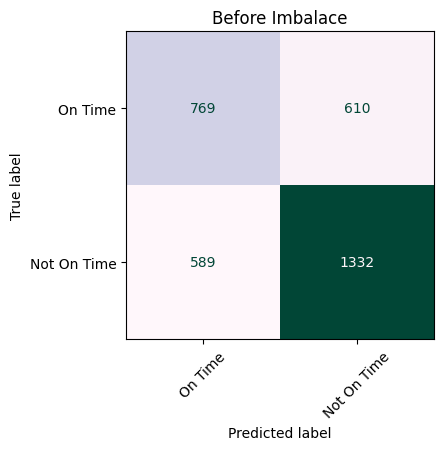

In [42]:
#Đánh giá mô hình bằng confusion matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred_log_reg)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
fig, ax = plt.subplots(figsize=(4, 4))
labels = ['On Time', 'Not On Time']#Tên class
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_log_reg, display_labels=labels, xticks_rotation=45,
    ax=ax, colorbar=False, cmap="PuBuGn");
plt.title('Before Imbalace');

## Imbalance Data

In [43]:
y_train.value_counts()

1    4642
0    3057
Name: Reached.on.Time_Y.N, dtype: int64

In [44]:
from collections import Counter
from imblearn.under_sampling import NearMiss

In [45]:
#Nearmiss
data_res = NearMiss()
X_res, y_res = data_res.fit_resample(X_train, y_train)
y_res.value_counts()

0    3057
1    3057
Name: Reached.on.Time_Y.N, dtype: int64

In [46]:
print('Original dataset shape %s' % Counter(y_train))

Original dataset shape Counter({1: 4642, 0: 3057})


In [47]:
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 3057, 1: 3057})


In [48]:
log_reg.fit(X_res, y_res)

LogisticRegression(max_iter=1000, random_state=33, solver='liblinear')

In [49]:
log_reg.score(X_test,y_test)

0.6487878787878788

In [50]:
y_pred_log_reg_balance = log_reg.predict(X_test)

In [51]:
print(classification_report(y_test, y_pred_log_reg_balance))

              precision    recall  f1-score   support

           0       0.56      0.76      0.65      1379
           1       0.77      0.57      0.65      1921

    accuracy                           0.65      3300
   macro avg       0.66      0.66      0.65      3300
weighted avg       0.68      0.65      0.65      3300



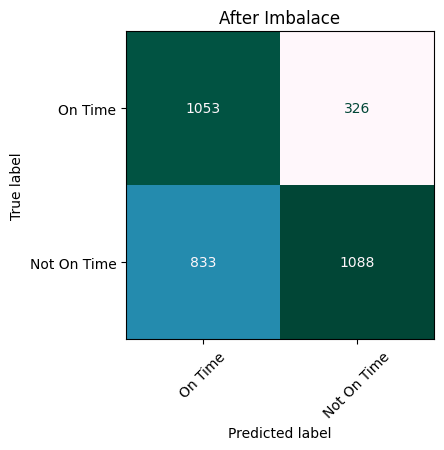

In [52]:
#Đánh giá mô hình bằng confusion matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred_log_reg_balance)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
fig, ax = plt.subplots(figsize=(4, 4))
labels = ['On Time', 'Not On Time']#Tên class
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_log_reg_balance, display_labels=labels, xticks_rotation=45,
    ax=ax, colorbar=False, cmap="PuBuGn");
plt.title('After Imbalace');

## SVC

In [53]:
SVC_model = SVC(kernel='linear',C = 0.001, gamma=0.0001, random_state = 33)
SVC_model.fit(X_res, y_res)

SVC(C=0.001, gamma=0.0001, kernel='linear', random_state=33)

In [54]:
SVC_model.score(X_test,y_test)

0.563030303030303

In [55]:
y_pred_SVC = SVC_model.predict(X_test)

In [56]:
print(classification_report(y_test, y_pred_SVC))

              precision    recall  f1-score   support

           0       0.48      0.62      0.54      1379
           1       0.66      0.52      0.58      1921

    accuracy                           0.56      3300
   macro avg       0.57      0.57      0.56      3300
weighted avg       0.58      0.56      0.57      3300



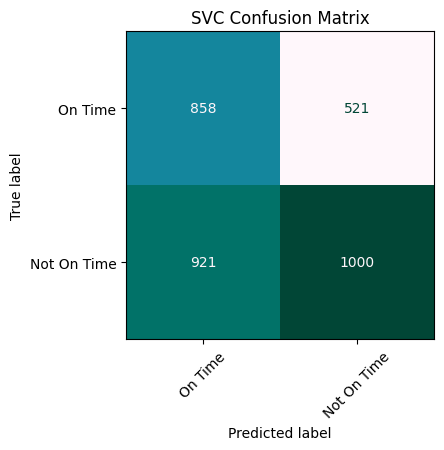

In [57]:
#Đánh giá mô hình bằng confusion matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred_SVC)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
fig, ax = plt.subplots(figsize=(4, 4))
labels = ['On Time', 'Not On Time']#Tên class
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_SVC, display_labels=labels, xticks_rotation=45,
    ax=ax, colorbar=False, cmap="PuBuGn");
plt.title('SVC Confusion Matrix');

### Hyperparameter

In [58]:
# define hyper parameter + search space
sv_clf = SVC(C=1.0, kernel='rbf', degree=3,
             gamma='scale', coef0=0.0, shrinking=True)
params = {
    'C': loguniform(0.001, 10),
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': randint(1, 5),
    'gamma': ['scale', 'auto'],
}

rand_search_SVC = RandomizedSearchCV(
    estimator=sv_clf,
    param_distributions=params,
    n_iter=15,
    cv=StratifiedKFold(5),
    scoring='accuracy',
    verbose=2,
)


In [59]:
rand_search_SVC.fit(X_res, y_res)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV] END C=0.09972505705778004, degree=4, gamma=auto, kernel=sigmoid; total time=   7.3s
[CV] END C=0.09972505705778004, degree=4, gamma=auto, kernel=sigmoid; total time=   5.9s
[CV] END C=0.09972505705778004, degree=4, gamma=auto, kernel=sigmoid; total time=   4.3s
[CV] END C=0.09972505705778004, degree=4, gamma=auto, kernel=sigmoid; total time=   3.3s
[CV] END C=0.09972505705778004, degree=4, gamma=auto, kernel=sigmoid; total time=   2.6s
[CV] END C=1.0907801300020639, degree=2, gamma=scale, kernel=poly; total time=   1.2s
[CV] END C=1.0907801300020639, degree=2, gamma=scale, kernel=poly; total time=   1.2s
[CV] END C=1.0907801300020639, degree=2, gamma=scale, kernel=poly; total time=   1.3s
[CV] END C=1.0907801300020639, degree=2, gamma=scale, kernel=poly; total time=   1.2s
[CV] END C=1.0907801300020639, degree=2, gamma=scale, kernel=poly; total time=   1.2s
[CV] END C=3.2194901674526877, degree=3, gamma=auto, kernel=sigm

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=SVC(), n_iter=15,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7d93bd91ba90>,
                                        'degree': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7d93be2be6e0>,
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']},
                   scoring='accuracy', verbose=2)

In [60]:
rand_search_SVC.best_params_

{'C': 3.0557384229983815, 'degree': 1, 'gamma': 'scale', 'kernel': 'poly'}

In [61]:
tuned_sv_clf = rand_search_SVC.best_estimator_

In [62]:
# evaluate
y_pred_SVC_Hyper = tuned_sv_clf.predict(X_test)
print(classification_report(y_test, y_pred_SVC_Hyper))

              precision    recall  f1-score   support

           0       0.56      0.94      0.70      1379
           1       0.92      0.46      0.62      1921

    accuracy                           0.66      3300
   macro avg       0.74      0.70      0.66      3300
weighted avg       0.77      0.66      0.65      3300



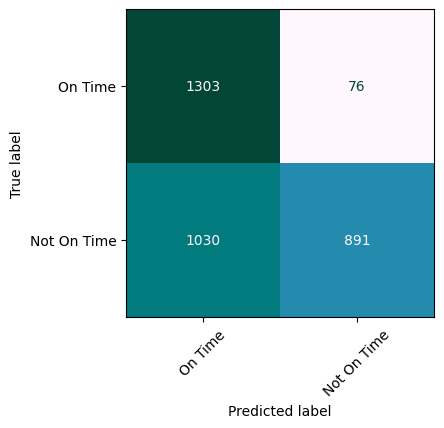

In [63]:
#Đánh giá mô hình bằng confusion matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred_SVC_Hyper)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
fig, ax = plt.subplots(figsize=(4, 4))
labels = ['On Time', 'Not On Time']#Tên class
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_SVC_Hyper, display_labels=labels, xticks_rotation=45,
    ax=ax, colorbar=False, cmap="PuBuGn");

## AdaBoost Tree Without Turning

In [64]:
# define
et_clf = DecisionTreeClassifier(
    criterion='gini',
    max_depth=4,
    min_samples_split=2,
    min_samples_leaf=1,
    max_leaf_nodes=None,
    max_features=None,
)
ada_clf = AdaBoostClassifier(
    estimator=et_clf,
    n_estimators=50,
    learning_rate=1.0,
    random_state=33,
)
# train
ada_clf.fit(X_res, y_res)
# eval
y_pred_ada = ada_clf.predict(X_test)
print(classification_report(y_test, y_pred_ada))

              precision    recall  f1-score   support

           0       0.57      0.72      0.63      1379
           1       0.75      0.61      0.67      1921

    accuracy                           0.65      3300
   macro avg       0.66      0.66      0.65      3300
weighted avg       0.67      0.65      0.65      3300



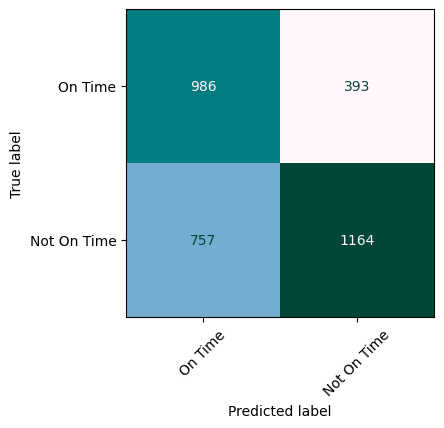

In [65]:
#Đánh giá mô hình bằng confusion matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred_ada)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
fig, ax = plt.subplots(figsize=(4, 4))
labels = ['On Time', 'Not On Time']#Tên class
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_ada, display_labels=labels, xticks_rotation=45,
    ax=ax, colorbar=False, cmap="PuBuGn");

## AdaBoost Tree With Turning

In [66]:
# define model
et_clf = DecisionTreeClassifier(
    criterion='gini',
    max_depth=4,
    min_samples_split=2,
    min_samples_leaf=1,
    max_leaf_nodes=None,
    max_features=None,
)
ada_clf = AdaBoostClassifier(
    estimator=et_clf,
    n_estimators=50,
    learning_rate=1.0,
    random_state=33,
)
# define search space
params = {
    'estimator__criterion': ['gini', 'entropy'],
    'estimator__max_depth': randint(2, 4),
    'estimator__min_samples_split': loguniform(0.001, 0.01),
    'estimator__min_samples_leaf': loguniform(0.001, 0.01),
    'estimator__max_leaf_nodes': randint(3, 8),
    'estimator__max_features': ['auto', 'sqrt', 'log2'],
    'n_estimators': [50, 100, 200],
    'learning_rate': loguniform(0.01, 2.0),
}


In [67]:
# randomized search cv
rand_search_ada = RandomizedSearchCV(ada_clf, param_distributions=params, n_iter=11,
                                 scoring='f1_micro', cv=StratifiedKFold(n_splits=5),
                                 random_state=33, verbose=2)

In [68]:
rand_search_ada.fit(X_res, y_res)

Fitting 5 folds for each of 11 candidates, totalling 55 fits
[CV] END estimator__criterion=gini, estimator__max_depth=3, estimator__max_features=auto, estimator__max_leaf_nodes=5, estimator__min_samples_leaf=0.0025759700125482666, estimator__min_samples_split=0.0018209570016018864, learning_rate=1.0064833317445285, n_estimators=200; total time=   1.5s
[CV] END estimator__criterion=gini, estimator__max_depth=3, estimator__max_features=auto, estimator__max_leaf_nodes=5, estimator__min_samples_leaf=0.0025759700125482666, estimator__min_samples_split=0.0018209570016018864, learning_rate=1.0064833317445285, n_estimators=200; total time=   1.5s
[CV] END estimator__criterion=gini, estimator__max_depth=3, estimator__max_features=auto, estimator__max_leaf_nodes=5, estimator__min_samples_leaf=0.0025759700125482666, estimator__min_samples_split=0.0018209570016018864, learning_rate=1.0064833317445285, n_estimators=200; total time=   1.0s
[CV] END estimator__criterion=gini, estimator__max_depth=3, 

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=4),
                                                random_state=33),
                   n_iter=11,
                   param_distributions={'estimator__criterion': ['gini',
                                                                 'entropy'],
                                        'estimator__max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7d93bd7c76a0>,
                                        'es...
                                        'estimator__min_samples_leaf': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7d93bd7c5420>,
                                        'estimator__min_samples_split': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7d93bd7c5c90>,
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7d93bd7c5e70>,
                                        'n_estimators': [50, 100, 200]},
                   random_state=33, scoring='f1_micro', verbose=2)

In [69]:
rand_search_ada.cv_results_

{'mean_fit_time': array([1.08859153, 0.20675144, 0.20997415, 0.45620737, 0.99143319,
        0.21576624, 0.22623625, 0.78313012, 0.95987215, 0.3286305 ,
        0.20602932]),
 'std_fit_time': array([0.23017744, 0.00618125, 0.01317995, 0.01126277, 0.1902727 ,
        0.03421576, 0.00493776, 0.007707  , 0.17472423, 0.01817807,
        0.00805389]),
 'mean_score_time': array([0.09215221, 0.02679482, 0.02357211, 0.04294715, 0.10107932,
        0.02504663, 0.022753  , 0.07654347, 0.09265375, 0.03057132,
        0.02427797]),
 'std_score_time': array([0.01996182, 0.00452004, 0.00243524, 0.00470407, 0.01933725,
        0.00124189, 0.00057934, 0.00253234, 0.01706818, 0.00462091,
        0.00286828]),
 'param_estimator__criterion': masked_array(data=['gini', 'gini', 'entropy', 'entropy', 'gini', 'gini',
                    'entropy', 'entropy', 'entropy', 'entropy', 'gini'],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False],
   

In [70]:
rand_search_ada.best_params_

{'estimator__criterion': 'entropy',
 'estimator__max_depth': 3,
 'estimator__max_features': 'sqrt',
 'estimator__max_leaf_nodes': 6,
 'estimator__min_samples_leaf': 0.002826776440090867,
 'estimator__min_samples_split': 0.005258681265047595,
 'learning_rate': 0.03716398314708845,
 'n_estimators': 100}

In [71]:
rand_search_ada.best_estimator_

AdaBoostClassifier(estimator=DecisionTreeClassifier(criterion='entropy',
                                                    max_depth=3,
                                                    max_features='sqrt',
                                                    max_leaf_nodes=6,
                                                    min_samples_leaf=0.002826776440090867,
                                                    min_samples_split=0.005258681265047595),
                   learning_rate=0.03716398314708845, n_estimators=100,
                   random_state=33)

In [72]:
tuned_ada_clf = rand_search_ada.best_estimator_
y_pred_ada_hyper = tuned_ada_clf.predict(X_test)
print(classification_report(y_test, y_pred_ada_hyper))

              precision    recall  f1-score   support

           0       0.57      0.98      0.72      1379
           1       0.97      0.48      0.64      1921

    accuracy                           0.69      3300
   macro avg       0.77      0.73      0.68      3300
weighted avg       0.81      0.69      0.68      3300



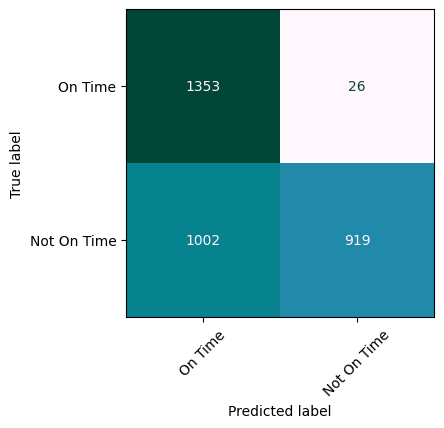

In [73]:
#Đánh giá mô hình bằng confusion matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred_ada_hyper)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
fig, ax = plt.subplots(figsize=(4, 4))
labels = ['On Time', 'Not On Time']#Tên class
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_ada_hyper, display_labels=labels, xticks_rotation=45,
    ax=ax, colorbar=False, cmap="PuBuGn");

In [74]:
estimator = tuned_ada_clf.estimators_[0]
fi = estimator.feature_importances_
fn = X_train.columns.to_numpy()

index = np.flip(np.argsort(fi))
for name, importance in zip(fn[index], fi[index]):
    if importance > 0:
        print(name, importance)

minmax_scaler__Discount_offered 0.5710328425965157
minmax_scaler__Weight_in_gms 0.3863003073969027
one_hot__Prior_purchases_10 0.029165193009355727
one_hot__Mode_of_Shipment_Road 0.010498960965977744
one_hot__Customer_care_calls_3 0.0030026960312482666
